In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


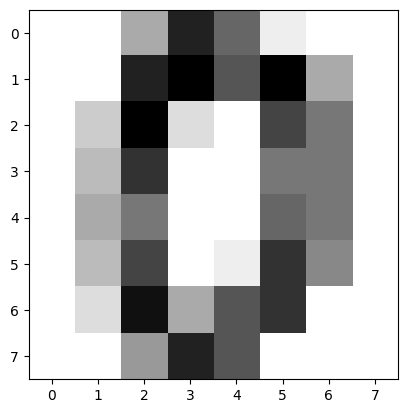

In [2]:
plt.imshow(digits.images[0], cmap='binary')
plt.show()

In [3]:
print(digits.target[0])
print(digits.data[0])

0
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


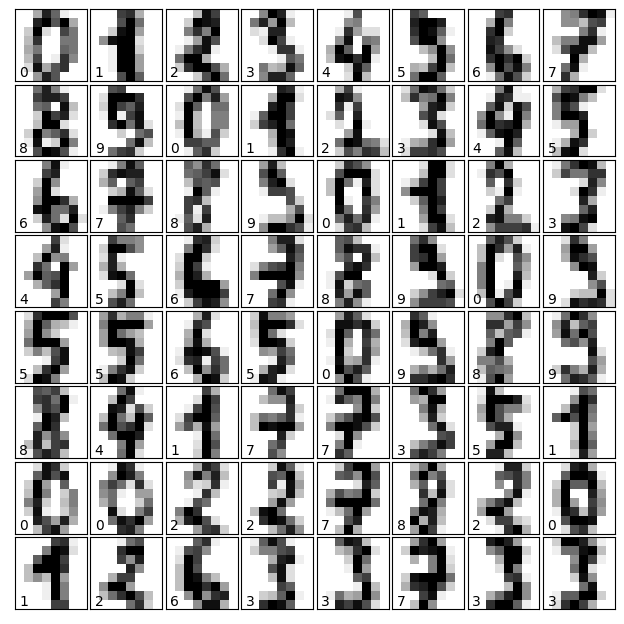

In [4]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

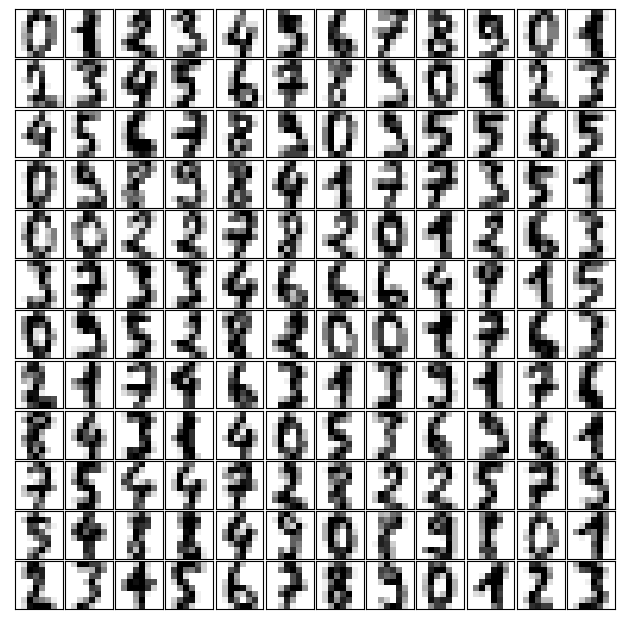

In [5]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(144):
    ax = fig.add_subplot(12, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

In [6]:
res = train_test_split(digits.data, digits.target, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res 

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(5,), 
                    activation='logistic', 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4,
                    random_state=1,
                    learning_rate_init=.3, 
                    verbose=True)

clf = LogisticRegression(solver='lbfgs', max_iter=10000)

In [8]:
mlp.fit(train_data, train_labels)

Iteration 1, loss = 2.25145782
Iteration 2, loss = 1.97730357
Iteration 3, loss = 1.66620880
Iteration 4, loss = 1.41353830
Iteration 5, loss = 1.29575643
Iteration 6, loss = 1.06663583
Iteration 7, loss = 0.95474028
Iteration 8, loss = 0.97548223
Iteration 9, loss = 0.83960705
Iteration 10, loss = 0.74988720
Iteration 11, loss = 0.75949015
Iteration 12, loss = 0.66633791
Iteration 13, loss = 0.68855099
Iteration 14, loss = 0.73501031
Iteration 15, loss = 0.75383665
Iteration 16, loss = 0.63707842
Iteration 17, loss = 0.74414825
Iteration 18, loss = 0.66334479
Iteration 19, loss = 0.63841643
Iteration 20, loss = 0.58215514
Iteration 21, loss = 0.74555663
Iteration 22, loss = 0.58978747
Iteration 23, loss = 0.61552749
Iteration 24, loss = 0.73804734
Iteration 25, loss = 0.60047795
Iteration 26, loss = 0.62818423
Iteration 27, loss = 0.56563089
Iteration 28, loss = 0.61188632
Iteration 29, loss = 0.62810888
Iteration 30, loss = 0.61319031
Iteration 31, loss = 0.64317216
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,),
              learning_rate_init=0.3, random_state=1, solver='sgd',
              verbose=True)

In [9]:
clf.fit(train_data, train_labels)

LogisticRegression(max_iter=10000)

In [10]:
predictions_lr = clf.predict(test_data)
predictions_mlp = mlp.predict(test_data)
print(predictions_lr[:25])
print(predictions_mlp[:25])
print(test_labels[:25])

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0]
[1 5 0 7 1 0 6 1 5 4 9 2 1 8 4 6 7 3 7 1 7 1 8 6 0]
[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0]


In [11]:
print(accuracy_score(test_labels, predictions_lr))
print(accuracy_score(test_labels, predictions_mlp))

0.9722222222222222
0.8277777777777777


In [12]:
for i in range(5, 35):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), 
                        activation='logistic', 
                        random_state=1,
                        alpha=1e-4,
                        max_iter=10000,
                        solver='sgd', 
                        tol=1e-4,
                        learning_rate_init=.3, 
                        verbose=False)
    mlp.fit(train_data, train_labels)
    predictions = mlp.predict(test_data)
    acc_score = accuracy_score(test_labels, predictions)
    print(i, acc_score)

5 0.8277777777777777
6 0.8861111111111111
7 0.8722222222222222
8 0.9277777777777778
9 0.9027777777777778
10 0.9444444444444444
11 0.9555555555555556
12 0.9305555555555556
13 0.9083333333333333
14 0.9361111111111111
15 0.9166666666666666
16 0.9416666666666667
17 0.9444444444444444
18 0.9388888888888889
19 0.95
20 0.9638888888888889
21 0.9722222222222222
22 0.9722222222222222
23 0.9666666666666667
24 0.9805555555555555
25 0.9583333333333334
26 0.9805555555555555
27 0.975
28 0.9805555555555555
29 0.9611111111111111
30 0.9694444444444444
31 0.9694444444444444
32 0.975
33 0.9638888888888889
34 0.9666666666666667
